## 讀檔案，載入資料

In [ ]:
import json
def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        return {item['cuisine_id']: item for item in json.load(f)}

gt_file = 'ground_truth.json'
gpt_file = 'response_gpt.json'
gemini_file = 'response_gemini.json'
claude_file = 'response_claude.json'

gt_data = load_json(gt_file)
gpt_data = load_json(gpt_file)
gemini_data = load_json(gemini_file)
claude_data = load_json(claude_file)

print(gt_data)
print(gpt_data)
print(gemini_data)
print(claude_data)

## 資料整理

### ingredients 變成 sentence 

In [ ]:
# {id:" ", ing:" "}
gt_ing_sentence_dic = {}
gpt_ing_sentence_dic = {}
gemini_ing_sentence_dic = {}
claude_ing_sentence_dic = {}

def ingredients_to_sentence (data):
    ing_sentence = {}
    for item in data:
        sentence = ""
        for ingredient_list in data[item]['ingredients']:
            sentence = sentence + ingredient_list['ingredient'] + ' '
        ing_sentence[item] = sentence
    return ing_sentence

gt_ing_sentence_dic = ingredients_to_sentence(gt_data)
gpt_ing_sentence_dic = ingredients_to_sentence(gpt_data)
gemini_ing_sentence_dic = ingredients_to_sentence(gemini_data)
claude_ing_sentence_dic = ingredients_to_sentence(claude_data)

### Instruction 變成 sentence

In [ ]:
# {id:" ", instrc:" "}
gt_instrc_sentence_dic = {}
gpt_instrc_sentence_dic = {}
gemini_instrc_sentence_dic = {}
claude_instrc_sentence_dic = {}

def instructions_to_sentence (data):
    print(data)
    instrc_sentence = {}
    for item in data:
        print(data[item]['cooking_instructions'])
        instrc_sentence[item] = data[item]['cooking_instructions']
    return instrc_sentence

gt_instrc_sentence_dic = instructions_to_sentence(gt_data)
gpt_instrc_sentence_dic = instructions_to_sentence(gpt_data)
gemini_instrc_sentence_dic = instructions_to_sentence(gemini_data)
claude_instrc_sentence_dic = instructions_to_sentence(claude_data)


## 食材種類正確性

### ROUGE

In [13]:
! pip install rouge jieba

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from rouge import Rouge
import jieba

In [ ]:
gpt_ing_rouge = []
gemini_ing_rouge = []
claude_ing_rouge = []

def preprocess_text(text):
    words = jieba.lcut(text)
    processed_text = ' '.join(words)
    return processed_text

def rouge_for_ing_sentence(gt_ing_sentence, model_ing_sentence):
    processed_gt = preprocess_text(gt_ing_sentence)
    processed_model = preprocess_text(model_ing_sentence)
    print(processed_gt)
    print(processed_model)
    rouge = Rouge()
    scores = rouge.get_scores(processed_gt, processed_model)
    print(scores)
    return scores
    
def get_ing_rouge(gt_ing_sentence_dic, model_ing_sentence_dic):
    ing_rouge = []
    for gt_id, model_id in zip(gt_ing_sentence_dic, model_ing_sentence_dic):
        sentence1 = gt_ing_sentence_dic[gt_id]
        sentence2 = model_ing_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_rouge.append(rouge_for_ing_sentence(sentence1, sentence2))
        print(rouge_for_ing_sentence(sentence1, sentence2))
    return ing_rouge

gpt_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, gpt_ing_sentence_dic)
gemini_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, gemini_ing_sentence_dic)
claude_ing_rouge = get_ing_rouge(gt_ing_sentence_dic, claude_ing_sentence_dic)

print(f'gpt_ing_rouge = {gpt_ing_rouge}')
print(f'gemini_ing_rouge = {gemini_ing_rouge}')
print(f'claude_ing_rouge = {claude_ing_rouge}')

In [ ]:
gpt_ing_rouge_1 = []
gpt_ing_rouge_2 = []
gpt_ing_rouge_L = []

for items in gpt_ing_rouge:
    for item in items:
        print(item)
        gpt_ing_rouge_1.append(item['rouge-1']['f'])
        gpt_ing_rouge_2.append(item['rouge-2']['f'])
        gpt_ing_rouge_L.append(item['rouge-l']['f'])


gemini_ing_rouge_1 = []
gemini_ing_rouge_2 = []
gemini_ing_rouge_L = []

for items in gemini_ing_rouge:
    for item in items:
        print(item)
        gemini_ing_rouge_1.append(item['rouge-1']['f'])
        gemini_ing_rouge_2.append(item['rouge-2']['f'])
        gemini_ing_rouge_L.append(item['rouge-l']['f'])

claude_ing_rouge_1 = []
claude_ing_rouge_2 = []
claude_ing_rouge_L = []

for items in claude_ing_rouge:
    for item in items:
        print(item)
        claude_ing_rouge_1.append(item['rouge-1']['f'])
        claude_ing_rouge_2.append(item['rouge-2']['f'])
        claude_ing_rouge_L.append(item['rouge-l']['f'])

print(claude_ing_rouge_2)

{'rouge-1': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.26666666666666666, 'p': 0.4, 'f': 0.31999999520000005}}
{'rouge-1': {'r': 0.6428571428571429, 'p': 0.6923076923076923, 'f': 0.6666666616735254}, 'rouge-2': {'r': 0.07692307692307693, 'p': 0.08333333333333333, 'f': 0.07999999500800031}, 'rouge-l': {'r': 0.42857142857142855, 'p': 0.46153846153846156, 'f': 0.4444444394513032}}
{'rouge-1': {'r': 0.6363636363636364, 'p': 0.5833333333333334, 'f': 0.6086956471833649}, 'rouge-2': {'r': 0.3, 'p': 0.2727272727272727, 'f': 0.2857142807256236}, 'rouge-l': {'r': 0.5454545454545454, 'p': 0.5, 'f': 0.5217391254442345}}
{'rouge-1': {'r': 0.21428571428571427, 'p': 0.42857142857142855, 'f': 0.28571428126984133}, 'rouge-2': {'r': 0.0, 'p': 0.0, 'f': 0.0}, 'rouge-l': {'r': 0.21428571428571427, 'p': 0.42857142857142855, 'f': 0.28571428126984133}}
{'rouge-1': {'r': 0.26666666666666666, 'p': 0.3333333333333333, 'f': 0.2962

plot ROUGE 1

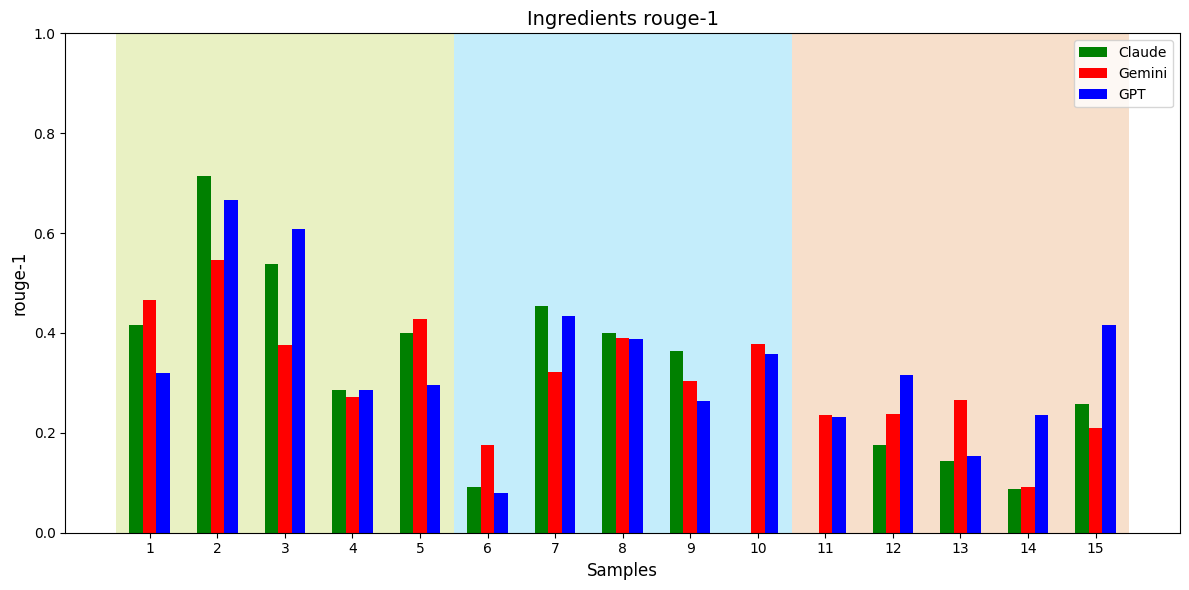

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_1, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_1, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_1, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Ingredients rouge-1', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rouge1.png')

plot ROUGE 2

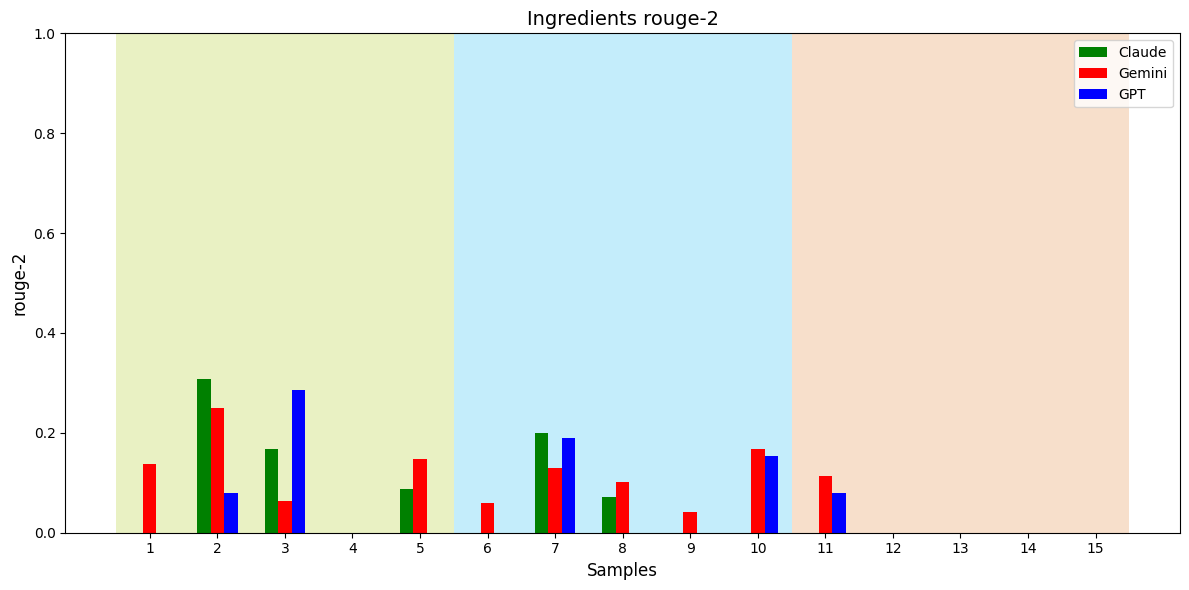

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_2, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_2, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_2, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-2', fontsize=12)
ax.set_title('Ingredients rouge-2', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rouge2.png')

plot ROUGE-L

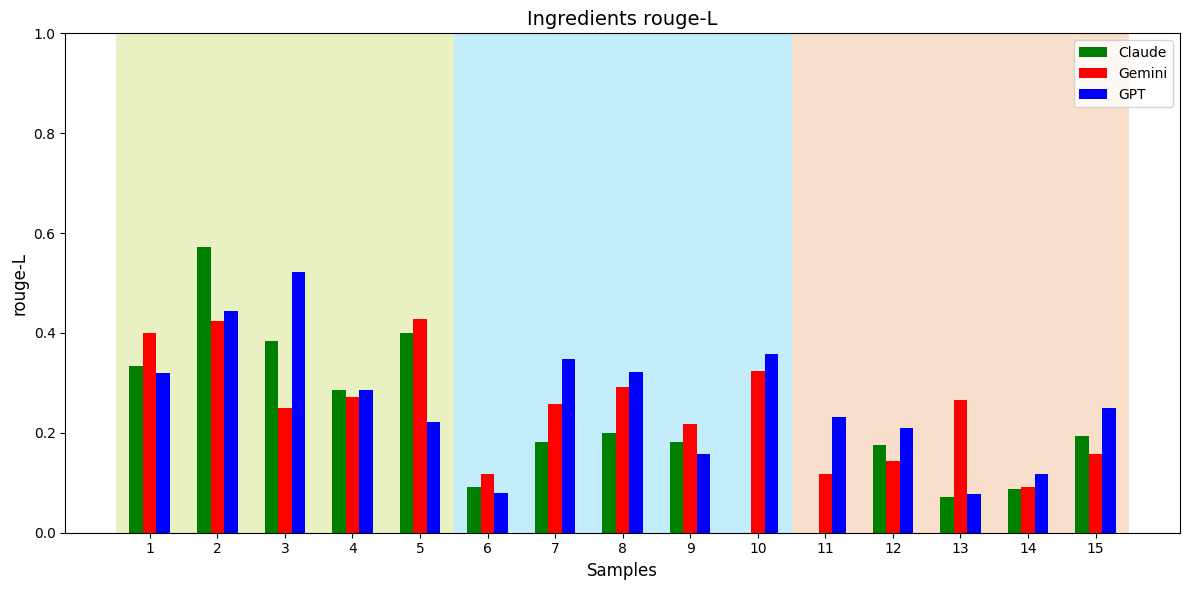

In [ ]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_ing_rouge_L, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_ing_rouge_L, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_ing_rouge_L, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-L', fontsize=12)
ax.set_title('Ingredients rouge-L', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('ing_rougeL.png')

## Cooking Instructions

### ROUGE

In [46]:
gpt_instrc_rouge = []
gemini_instrc_rouge = []
claude_instrc_rouge = []

def preprocess_text(text):
    words = jieba.lcut(text)
    processed_text = ' '.join(words)
    return processed_text

def rouge_for_instrc_sentence(gt_instrc_sentence, model_instrc_sentence):
    processed_gt = preprocess_text(gt_instrc_sentence)
    processed_model = preprocess_text(model_instrc_sentence)
    print(processed_gt)
    print(processed_model)
    rouge = Rouge()
    scores = rouge.get_scores(processed_gt, processed_model)
    print(scores)
    return scores
    
def get_instrc_rouge(gt_instrc_sentence_dic, model_instrc_sentence_dic):
    ing_rouge = []
    for gt_id, model_id in zip(gt_instrc_sentence_dic, model_instrc_sentence_dic):
        sentence1 = gt_instrc_sentence_dic[gt_id]
        sentence2 = model_instrc_sentence_dic[model_id]
        print(sentence1)
        print(sentence2)
        ing_rouge.append(rouge_for_instrc_sentence(sentence1, sentence2))
        print(rouge_for_instrc_sentence(sentence1, sentence2))
    return ing_rouge

gpt_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, gpt_instrc_sentence_dic)
gemini_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, gemini_instrc_sentence_dic)
claude_instrc_rouge = get_instrc_rouge(gt_instrc_sentence_dic, claude_instrc_sentence_dic)

print(f'gpt_instrc_rouge = {gpt_instrc_rouge}')
print(f'gemini_instrc_rouge = {gemini_instrc_rouge}')
print(f'claude_instrc_rouge = {claude_instrc_rouge}')

小黃瓜洗淨後，去除頭尾，然後以菜刀拍碎; 將拍碎的小黃瓜切小段; 加入細砂糖拌勻，去菁15分鐘; 辣椒清洗後切成辣椒圈; 蒜頭清洗後切成蒜末; 用手將小黃瓜多餘的水份擠出，然後倒掉; 加入辣椒圈和蒜末; 加入醬油; 加入烏醋; 加入鹽; 淋上加熱後的植物油(淋熱油); 將所有食材拌勻即可食用; 於冰箱醃漬2小時以上會更入味更好吃; 
將五花肉切成小丁，紅蔥頭切片、蒜頭拍碎。熱鍋加少許油，爆香紅蔥頭與蒜頭，加入五花肉煎炒至出油上色。加入醬油、米酒、冰糖、白胡椒粉繼續拌炒。加入水後轉中小火燉煮約40分鐘，期間可放入滷蛋一起滷製。完成後將滷肉盛於白飯上，即可享用。
小黃瓜 洗淨 後 ， 去除 頭尾 ， 然後以 菜刀 拍碎 ;   將拍 碎 的 小 黃 瓜切 小段 ;   加入 細 砂糖 拌 勻 ， 去菁 15 分鐘 ;   辣椒 清洗 後 切成 辣椒 圈 ;   蒜頭 清洗 後 切成 蒜末 ;   用手 將小黃瓜 多餘 的 水份 擠出 ， 然 後 倒掉 ;   加入 辣椒 圈 和 蒜末 ;   加入 醬油 ;   加入 烏醋 ;   加入 鹽 ;   淋上 加熱 後 的 植物油 ( 淋熱油 ) ;   將 所有 食材 拌 勻 即可 食用 ;   於 冰箱 醃漬 2 小時 以上 會 更 入味 更 好吃 ;  
將 五花肉 切 成小丁 ， 紅蔥頭 切片 、 蒜頭 拍碎 。 熱鍋 加少 許油 ， 爆香 紅蔥頭 與 蒜頭 ， 加入 五花肉 煎炒 至 出油 上色 。 加入 醬油 、 米酒 、 冰糖 、 白 胡椒粉 繼續 拌 炒 。 加入 水後轉 中 小火 燉 煮 約 40 分鐘 ， 期間 可 放入 滷 蛋 一起 滷 製 。 完成 後 將 滷 肉 盛 於 白 飯 上 ， 即可 享用 。
[{'rouge-1': {'r': 0.20754716981132076, 'p': 0.1746031746031746, 'f': 0.18965516745095137}, 'rouge-2': {'r': 0.014084507042253521, 'p': 0.011494252873563218, 'f': 0.012658222899377033}, 'rouge-l': {'r': 0.1509433962264151, 'p': 0.12698412698412698, 'f':

In [47]:
gpt_instrc_rouge_1 = []
gpt_instrc_rouge_2 = []
gpt_instrc_rouge_L = []

for items in gpt_instrc_rouge:
    for item in items:
        print(item)
        gpt_instrc_rouge_1.append(item['rouge-1']['f'])
        gpt_instrc_rouge_2.append(item['rouge-2']['f'])
        gpt_instrc_rouge_L.append(item['rouge-l']['f'])


gemini_instrc_rouge_1 = []
gemini_instrc_rouge_2 = []
gemini_instrc_rouge_L = []

for items in gemini_instrc_rouge:
    for item in items:
        print(item)
        gemini_instrc_rouge_1.append(item['rouge-1']['f'])
        gemini_instrc_rouge_2.append(item['rouge-2']['f'])
        gemini_instrc_rouge_L.append(item['rouge-l']['f'])

claude_instrc_rouge_1 = []
claude_instrc_rouge_2 = []
claude_instrc_rouge_L = []

for items in claude_instrc_rouge:
    for item in items:
        print(item)
        claude_instrc_rouge_1.append(item['rouge-1']['f'])
        claude_instrc_rouge_2.append(item['rouge-2']['f'])
        claude_instrc_rouge_L.append(item['rouge-l']['f'])

print(claude_instrc_rouge_2)

{'rouge-1': {'r': 0.20754716981132076, 'p': 0.1746031746031746, 'f': 0.18965516745095137}, 'rouge-2': {'r': 0.014084507042253521, 'p': 0.011494252873563218, 'f': 0.012658222899377033}, 'rouge-l': {'r': 0.1509433962264151, 'p': 0.12698412698412698, 'f': 0.13793102951991695}}
{'rouge-1': {'r': 0.3125, 'p': 0.20408163265306123, 'f': 0.24691357546715448}, 'rouge-2': {'r': 0.05813953488372093, 'p': 0.03205128205128205, 'f': 0.04132230946793303}, 'rouge-l': {'r': 0.1875, 'p': 0.12244897959183673, 'f': 0.1481481433683891}}
{'rouge-1': {'r': 0.4107142857142857, 'p': 0.17293233082706766, 'f': 0.24338623921614738}, 'rouge-2': {'r': 0.0273972602739726, 'p': 0.009900990099009901, 'f': 0.014545450645686993}, 'rouge-l': {'r': 0.19642857142857142, 'p': 0.08270676691729323, 'f': 0.11640211223202052}}
{'rouge-1': {'r': 0.2, 'p': 0.203125, 'f': 0.20155038259719982}, 'rouge-2': {'r': 0.03488372093023256, 'p': 0.033707865168539325, 'f': 0.034285709287184406}, 'rouge-l': {'r': 0.16923076923076924, 'p': 0.1

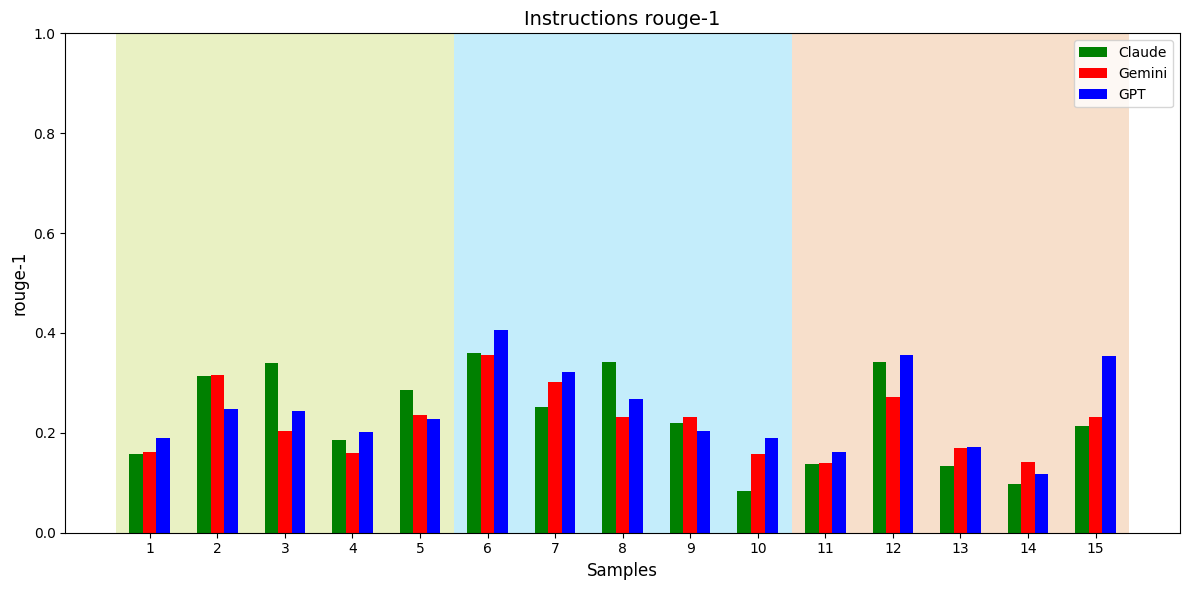

In [48]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_1, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_1, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_1, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Instructions rouge-1', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge1.png')

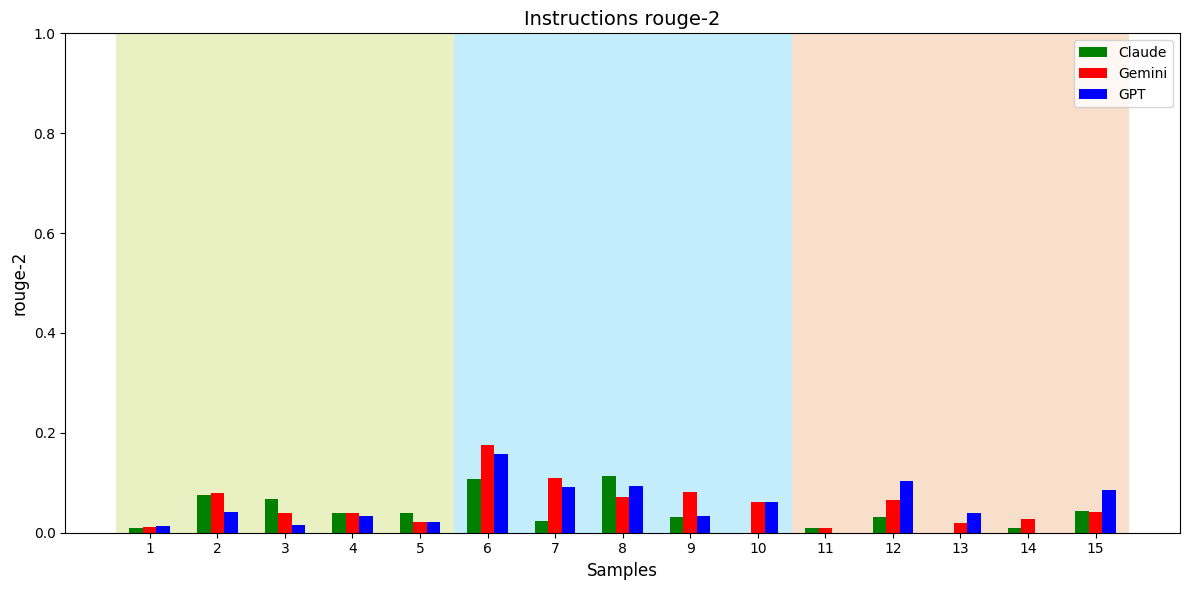

In [49]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_2, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_2, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_2, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-2', fontsize=12)
ax.set_title('Instructions rouge-2', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge2.png')

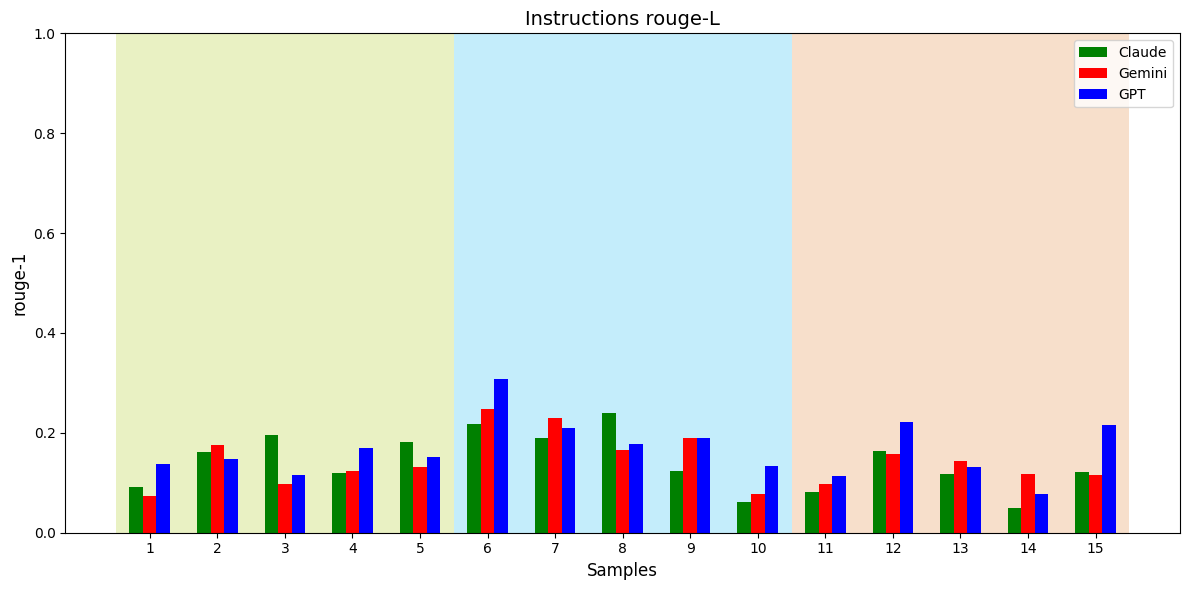

In [50]:
import matplotlib.pyplot as plt
x = list(range(1, 16))
x2 = [i + 0.2 for i in x]
x3 = [i - 0.2 for i in x]

fig, ax = plt.subplots(figsize=(12, 6))

color_map = {0: "#e9f1c3", 5: "#c4edfb", 10: "#f7dfcb"}

for i in range(0, 15, 5):
    ax.axvspan(i + 0.5, i + 5.5, facecolor=color_map[i], alpha=0.99)


# 畫長條圖
ax.bar(x3, claude_instrc_rouge_L, color='g', width=0.2, label='Claude')
ax.bar(x, gemini_instrc_rouge_L, color='r', width=0.2, label='Gemini')
ax.bar(x2, gpt_instrc_rouge_L, color='b', width=0.2, label='GPT')

# 加上 legend、標題與格式調整
ax.legend()
ax.set_xticks(range(1, 16))
ax.set_xlabel('Samples', fontsize=12)
ax.set_ylabel('rouge-1', fontsize=12)
ax.set_title('Instructions rouge-L', fontsize=14)
ax.set_ylim(0.0, 1.0)

plt.tight_layout()
plt.savefig('instrc_rouge_L.png')